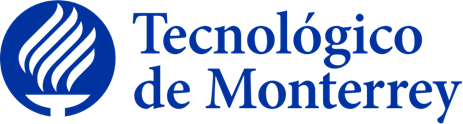

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Proyecto Integrador**

### Dra. Grettel Barceló Alonso
### Dr. Luis Eduardo Falcón Morales
### Mtra. Verónica Sandra Guzmán de Valle

### Domingo 26 de mayo de 2024

## **Nombres y matrículas de los integrantes del Equipo 10:**

* Fernando Maytorena Espinosa de los Monteros | A01110946
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

### 0. Introduction

Last week deliverable was focused on generating a few instruction sets using Google Gemini for testing. Nonetheless, there were some limitations with Gemini, which made us to change our strategy. In this notebook we'll generate al the instruction set for the model finetuning by using Langchain and OpenAI's ChatGPT 3.5 Turbo. 

Please be aware that in order to run this notebook successfully, it's necessary to provide in a .env file the following API Keys:

* OPENAI_API_KEY
* HF_TOKEN

### 1. Libraries

First, we'll install and load the libraries that we will be using for this project.

In [13]:
!pip install python-dotenv huggingface_hub datasets langchain langchain_openai rich langchain_text_splitters pydantic chardet

In [14]:
from dotenv import load_dotenv
import os
from rich import print
from langchain_openai import ChatOpenAI
from generator.dataset_generator import DatasetGenerator
from typing import Dict, List
from datasets import Dataset

### 2. Model Specification

Now we'll proceed to load the API keys from the .env file and specify the model we'll use to generate the instruction set.

In [2]:
load_dotenv()  # Load the environment variables from .env

# Access the OPENAI_API_KEY environment variable
openai_api_key = os.getenv("OPENAI_API_KEY")
hf_token = os.getenv("HF_TOKEN")

# Set the corresponding API key
api_key = openai_api_key

# Specify the model name (e.g., "gpt-3.5-turbo", "gpt-4-turbo" or "gpt-4o")
model_name = "gpt-3.5-turbo"

### 3. Downloading the mexican laws dataset

In one of the previous weeks, we preprocessed all the laws and stored them in a parquet file for easier access. Now, we'll download that file and use its content for generating the instruction set.

In [3]:
url = "https://github.com/rafaeljosem/MNA-ProyectoIntegrador_EQ10/raw/main/Avance-4/mexican_laws"

# Create an instance of the LegalDatasetGenerator
llm = ChatOpenAI(model_name=model_name, openai_api_key=api_key, temperature=0)
generator = DatasetGenerator(llm=llm)

In [4]:
# Generate legal documents from the specified source
legal_documents = generator.generate_from_source(
    source_type='url',
    source=url,
)

In [5]:
print(f"Generated {len(legal_documents)} legal documents")

Generated 230 legal documents

### 4. Instruction Set Generation

Using the file content we now proceed to generate the instruction set by using a few helper functions that we coded. For demonstration purposes, we're limiting the amount of documents to 5. This is because the process is time-consuming and also prevents to reach rate limits from OpenAIs API.

Nonetheless, we were able to generate a instruction set we 2,000+ instructions. The set can be found in the same directory where this notebook is located.


In [7]:
tasks = ["Question Answering (QA)", "Summarization", "Legal Advice Generation", "Legal Document Drafting"]
max_pairs = 5

# Generate JSON objects from the legal documents
json_objects = generator.generate_from_legal_documents(
    legal_documents,
    #downstream_tasks=tasks,
    #max_pairs_per_article=max_pairs,
    chunk_size=4000,
    chunk_overlap=1000,
    document_limit = 5
)

/Users/rmateoc/.pyenv/versions/3.12.1/envs/proy_integrador/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Failed to generate JSON objects for chunk: Expecting value: line 1 column 1 (char 0)
---

This are all the pairs: [Task(question_answering=[QuestionAnsweringInstruction(instruction='¿Qué es el secuestro convencional y cómo se verifica según el contexto legal proporcionado?', output='El secuestro convencional se verifica cuando los litigantes depositan la cosa litigiosa en poder de un tercero que se obliga a entregarla, concluido el pleito, al que conforme a la sentencia tenga derecho a ella.', context='Artículo 2541.- El secuestro convencional se verifica cuando los litigantes depositan la cosa litigiosa en poder de un tercero que se obliga a entregarla, concluido el pleito, al que conforme a la sentencia tenga derecho a ella.'), QuestionAnsweringInstruction(instruction='¿Cuál es la diferencia entre el secuestro convencional y el secuestro judicial según el contexto legal proporcionado?', output='El secuestro convencional se realiza cuando los litigantes depositan la cosa litigiosa en 

In [8]:
print(json_objects)

Dataset(
    items=[
        Task(
            question_answering=[
                QuestionAnsweringInstruction(
                    instruction='¿Qué es el secuestro convencional y cómo se verifica según el contexto legal 
proporcionado?',
                    output='El secuestro convencional se verifica cuando los litigantes depositan la cosa litigiosa
en poder de un tercero que se obliga a entregarla, concluido el pleito, al que conforme a la sentencia tenga 
derecho a ella.',
                    context='Artículo 2541.- El secuestro convencional se verifica cuando los litigantes depositan 
la cosa litigiosa en poder de un tercero que se obliga a entregarla, concluido el pleito, al que conforme a la 
sentencia tenga derecho a ella.'
                ),
                QuestionAnsweringInstruction(
                    instruction='¿Cuál es la diferencia entre el secuestro convencional y el secuestro judicial 
según el contexto legal proporcionado?',
                    output='El secuestro convencional se realiza cuando los litigantes depositan la cosa litigiosa 
en poder de un tercero, mientras que el secuestro judicial se constituye por decreto del juez.',
                    context='Artículo 2544.- Secuestro judicial es el que se constituye por decreto del juez.'
                )
            ],
            summarization=[
                SummarizationInstruction(
                    instruction="Resume el contenido del Capítulo II 'Del Secuestro' según el contexto legal 
proporcionado.",
                    output="El Capítulo II 'Del Secuestro' aborda el concepto de secuestro, diferenciando entre 
secuestro convencional y judicial, y estableciendo las normas y procedimientos para cada tipo de secuestro.",
                    context='CAPITULO II\nDel Secuestro\n\nArtículo 2539.- El secuestro es el depósito de una cosa 
litigiosa en poder de un tercero, hasta que se decida a quién debe entregarse.\n\nArtículo 2540.- El secuestro es 
convencional o judicial.\n\nArtículo 2541.- El secuestro convencional se verifica cuando los litigantes depositan 
la cosa litigiosa en poder de un tercero que se obliga a entregarla, concluido el pleito, al que conforme a la 
sentencia tenga derecho a ella.\n\nArtículo 2542.- El encargado del secuestro convencional no puede libertarse de 
él antes de la terminación del pleito, sino consintiendo en ello todas las partes interesadas, o por una causa que 
el juez declare legítima.'
                )
            ],
            legal_advice=[
                LegalAdviceInstruction(
                    instruction='¿Qué consejo legal se puede ofrecer sobre la responsabilidad de los 
establecimientos mencionados en el contexto legal proporcionado?',
                    output='Los establecimientos como fondas, cafés, casas de baño, entre otros, no responden por 
los efectos que introduzcan los parroquianos a menos que los pongan bajo el cuidado de los empleados del 
establecimiento.',
                    context='Artículo 2538.- Las fondas, cafés, casas de baño y otros establecimientos semejantes, 
no responden de los efectos que introduzcan los parroquianos, a menos que los pongan bajo el cuidado de los 
empleados del establecimiento.'
                ),
                LegalAdviceInstruction(
                    instruction='¿Qué precaución legal se debe tener al otorgar un mandato según el contexto legal 
proporcionado?',
                    output='Es importante asegurarse de que el mandato sea otorgado de forma adecuada, ya sea por 
escrito o verbal, siguiendo las disposiciones legales correspondientes para evitar posibles anulaciones o 
complicaciones en el futuro.',
                    context='Artículo 2546.- El mandato es un contrato por el que el mandatario se obliga a 
ejecutar por cuenta del mandante los actos jurídicos que éste le encarga.'
                )
            ],
            document_drafting=[
                DocumentDraftingInstruction(
                    instruction='Red

### 5. Uploading to Hugging Face

Now, we flatten the dataset and convert it to a HuggingFace Dataset. Finally, we upload the dataset to the HuggingFace Hub

In [9]:
dataset = json_objects

flattened_dataset: List[Dict[str, str]] = [
    {
        "instruction": instruction.instruction,
        "output": instruction.output,
        "context": instruction.context,
    }
    for item in dataset.items
    for task_type in ["question_answering", "summarization", "legal_advice", "document_drafting"]
    for instruction in getattr(item, task_type)
]

In [10]:
print(len(flattened_dataset))

53

In [11]:
# Convert the generated dataset into a huggingface dataset
dataset = Dataset.from_list(flattened_dataset)

print(dataset)

Dataset({
    features: ['instruction', 'output', 'context'],
    num_rows: 53
})

In [ ]:
# Push the dataset to Hugging Face with metadata
dataset.push_to_hub(
    repo_id="a01110946/legal-dataset-03",
    private=False,  # Set to True if you want the dataset to be private
    token=hf_token,  # Use the API token for authentication
)


### 6. Conclusions

Generating instruction sets is not an easy endeavor, since it requires human with domain expertise to generate high-quality instructions. By using this method we were able to generate 2,000+ instruction sets for finetuning our model, which we'll be doing in the upcoming weeks.

As we said in our previous notebook, it's important to be aware of the limitations of this method. Even though it's easier and less intensive to generate a large amount of instruction sets than by using humans, it is known to us that the quality is inferior, which in turn will have some impact in our model.